In [1]:
import tqdm
import random
import pathlib
import itertools
import collections

import cv2
import einops
import numpy as np
import remotezip as rz
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras import layers

In [2]:
import numpy as np
import tensorflow as tf
import cv2
import os

video_folder = 'rsl-dataset1'

letterDict = {
    'd': ('д'),
    'ei': ('ё'),
    'z': ('з'),
    'ie': ('й'),
    'sch': ('щ'),
    'ъ': ('ъ'),
    'ь': ('ь'),
}
letterList = list (letterDict)

num_classes = len (letterList)

NUM_OF_FRAMES = 27
IMAGE_SIZE = 100

videosList = []
answerList = []

for video_file in os.listdir(video_folder):
    video_path = os.path.join(video_folder, video_file)
    
    cap = cv2.VideoCapture(video_path)

    frame_count = 0

    videoFramesList = []

    while cap.isOpened() and frame_count < NUM_OF_FRAMES:
        ret, frame = cap.read()
        
        if ret:
            frame = tf.image.convert_image_dtype (frame, tf.float32)
            frame = tf.image.resize_with_pad (frame, IMAGE_SIZE, IMAGE_SIZE)
            frame_count += 1
            videoFramesList.append (frame)
        else:
            break
    
    if len (videoFramesList) > 0:
        videosList.append (videoFramesList)
        answerList.append (letterList.index (video_file.split ('_') [0]))


In [3]:
max_len = max(map(len, videosList))
pad_image = tf.zeros((100, 100, 3))
videosList = np.array([video + [pad_image]*(max_len - len(video)) for video in videosList])
answerList = np.array(answerList)

In [4]:
from sklearn.preprocessing import LabelBinarizer

answerList_binarize = LabelBinarizer()
answerList = answerList_binarize.fit_transform(answerList)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(videosList, answerList, test_size = 0.2, random_state=12345)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 64
num_classes = 7
epochs = 20

In [7]:
x_train = x_train.astype ('float32') / 255
x_test = x_test.astype ('float32') / 255

In [8]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv3D, MaxPooling3D
import numpy as np
import matplotlib.pyplot as plt
model = Sequential()
model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(27,100,100,3)))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
model.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20


8/8 [==============================] - 114s 11s/step - loss: 1.8810 - accuracy: 0.2316 - val_loss: 1.9525 - val_accuracy: 0.1947
Epoch 2/20
8/8 [==============================] - 141s 17s/step - loss: 1.8352 - accuracy: 0.2561 - val_loss: 1.7943 - val_accuracy: 0.3805
Epoch 3/20
8/8 [==============================] - 108s 13s/step - loss: 1.6468 - accuracy: 0.4388 - val_loss: 1.7371 - val_accuracy: 0.4071
Epoch 4/20
8/8 [==============================] - 117s 15s/step - loss: 1.4581 - accuracy: 0.4944 - val_loss: 1.8101 - val_accuracy: 0.3363
Epoch 5/20
8/8 [==============================] - 129s 16s/step - loss: 1.3944 - accuracy: 0.5011 - val_loss: 1.3464 - val_accuracy: 0.5575
Epoch 6/20
8/8 [==============================] - 118s 15s/step - loss: 1.0926 - accuracy: 0.6258 - val_loss: 1.4963 - val_accuracy: 0.4513
Epoch 7/20
8/8 [==============================] - 122s 15s/step - loss: 0.9244 - accuracy: 0.6592 - val_loss: 1.0103 - val_accuracy: 0.6195
Epoch 8/20
8/8 [==

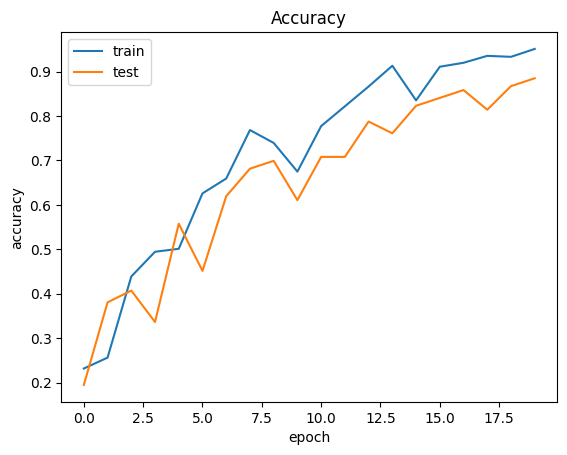

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [14]:
def getletter(result):
    classLabels = {0: 'Д',
                   1: 'Ё',
                   2: 'З',
                   3: 'Й',
                   4: 'Щ',
                   5: 'Ъ',
                   6: 'ь',}
    try:
        res = result.argmax ()
        return classLabels[res]
    except:
        return "Error"

In [16]:
y_pred = model.predict(x_test)

4/4 [==============================] - 7s 707ms/step


In [12]:
letterLabels = ['Д', 'Ё', 'З', 'Й', 'Щ', 'Ъ', 'Ь']

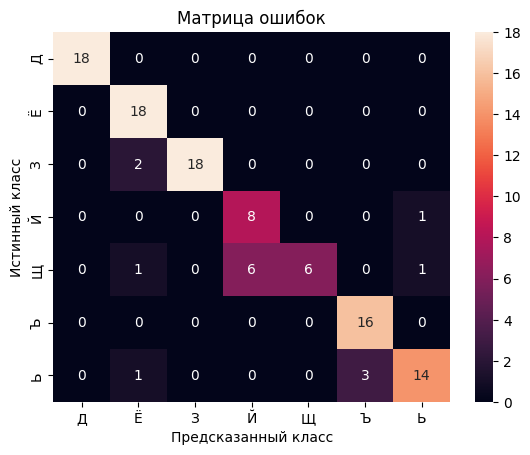

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plot = sns.heatmap (confusion_matrix (np.array ([getletter (i) for i in y_test]), np.array ([getletter (i) for i in y_pred.round ()])),
                    xticklabels = letterLabels, yticklabels = letterLabels, annot = True)
plt.title ('Матрица ошибок')
plt.xlabel ('Предсказанный класс')
plt.ylabel ('Истинный класс')
plt.show (plot)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred.round())

0.8407079646017699

In [ ]:
model.save("videonew(1).h5")

c:\Users\Пользователь\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret, frames = cap.read()



    roi = frames[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (900,900), interpolation = cv2.INTER_AREA)

    cv2.imshow('roi scaled and gray', roi)
    copy = frames.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)


    roi = roi.reshape(27, 100, 100, 3)

    result = model.predict (roi, 1, verbose = 0)[0]

    cv2.putText(copy, getletter(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow ('result', copy)

    if cv2.waitKey(1) == 13:
        break

cap.release()
cv2.destroyAllWindows()

ValueError: in user code:

    File "c:\Users\Пользователь\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\Пользователь\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Пользователь\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\Пользователь\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "c:\Users\Пользователь\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Пользователь\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 27, 100, 100, 3), found shape=(1, 100, 100, 3)
